**데이터 상세 설명**

네이버 영화 리뷰 데이터는 실제 네이버 영화에 사용자들이 남긴 리뷰를 가공한 데이터입니다.
label (리뷰의 감성 종류) : 긍정(1), 부정(0)

1. train.csv : 학습 데이터
id: 데이터의 id값
document: 리뷰 내용
label: 리뷰의 감성 종류


2. test.csv : 테스트 데이터
id: 데이터의 id값
document: 리뷰 내용


3. sample_submissoin.csv : 제출 양식
id: 데이터의 id값
label: 리뷰의 감성 종류


In [ ]:
pip install soynlp

In [ ]:
#한국어 폰트 다운로드 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
pip install konlpy

# 데이터 불러오기 

In [ ]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import re 

df_1 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D/train.csv"
df_2 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D/test.csv"
df_3 = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D/sample_submission.csv"

train = pd.read_csv(df_1)
test = pd.read_csv(df_2)
submission = pd.read_csv(df_3)

In [ ]:
# 데이터 개수 확인하기 

print("train set: {}개".format(len(train)))
print("test set: {}개".format(len(test)))

train set: 5000개
test set: 5000개


In [ ]:
train.tail()

,id,document,label
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1
4999,5000,"여주인공이 전작에서는 귀여웠는데, 여기선 완전 망했네, 실망이다",0


In [ ]:
test.tail()

,id,document
4995,4996,연계도 제대로 안되고 뭔가 부족한느낌이들고 찝찝한영화
4996,4997,내생에 최악의 영화중 하나 졸려서 미칠뻔....
4997,4998,지금까지 나온 드라마 중 최고였습니다. 100점 만점!
4998,4999,영화값으로 엄청난 공연을 보았다 - 이게 웬 횡재 ..
4999,5000,올해엔 롯데 자이언츠가 꼭 우승했으면...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [ ]:
label_count = pd.Series(train['label']).value_counts()
label_count.head()


0    2564
1    2436
Name: label, dtype: int64

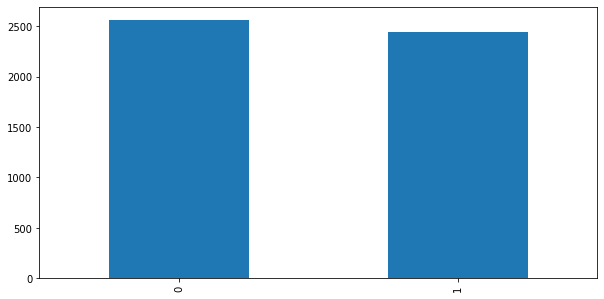

In [ ]:
label_count.head(2).plot.bar(figsize=(10,5))

In [ ]:
# Train 리뷰 중의 NULL 값 확인 
print(train.isnull().values.any())

False


In [ ]:
# Null 데이터 및 숫자를 공백으로 변환 (Train)

train = train.fillna('')
train['document'] = train['document'].apply(lambda a : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",a))

# Null 데이터 및 숫자를 공백으로 변환 (Test)
test = test.fillna('')
test['document'] = test['document'].apply(lambda b : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",b))


In [ ]:
from konlpy.tag import Okt 

stopwords= ['이','있','하','것','들','그','되','수','보','않','없','나','주','등','때','지','오','그런','또','더','많','그리고','크',
            '중','나오','씨','속','집','살','적','월','데','안','어떤','개','점','좀','잘','놓']

okt = Okt()

def one_tokenizer (text):
  ko_token = okt.morphs(text,stem = True)
  return ko_token 

print(one_tokenizer("너 지금 뭐 하고 있어? 나랑 라면 먹을래?"))

['너', '지금', '뭐', '하다', '있다', '?', '나', '랑', '라면', '먹다', '?']


# EDA

In [ ]:
#단어 빈도수 및 WorldCloud를 보기 위한 함수 생성하기 

twitter = Okt()

def tw_tokenizer_nouns(text):
    tokens_ko = twitter.nouns(text)
    return tokens_ko

nouns = []
for i in range(0,len(train['document'])):
    nouns.extend(tw_tokenizer_nouns(train['document'][i]))


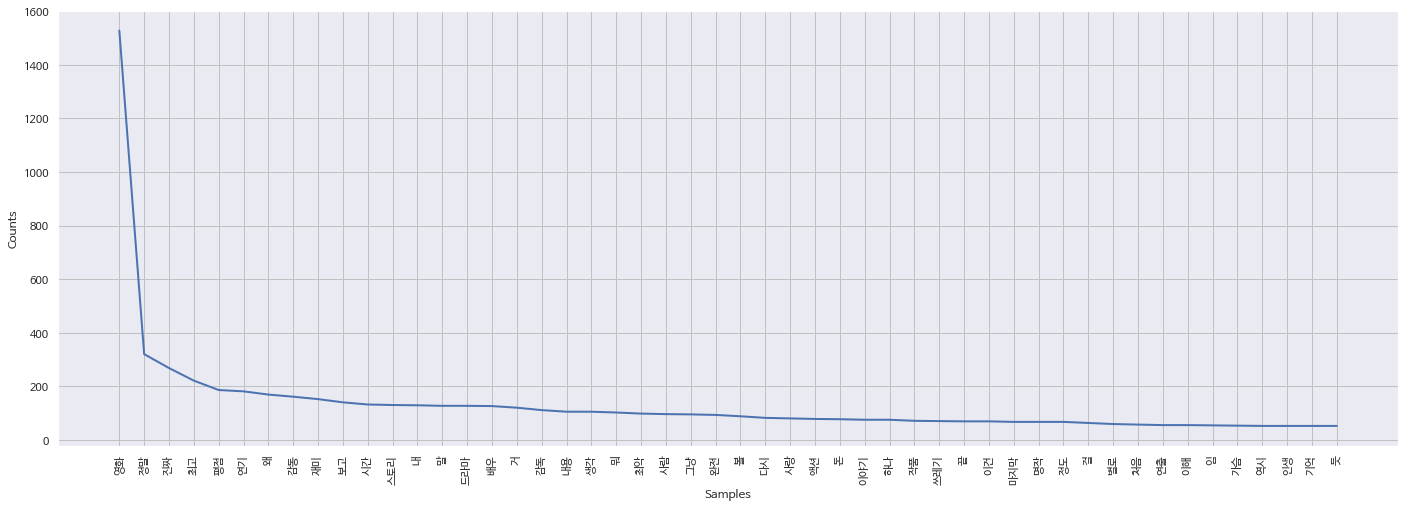

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk 
import seaborn as sns 

stopwords = list(STOPWORDS) + (['이','있','하','것','들','그','되','수','보','않','없','나','주','등','때','지','오','그런','또','더','많','그리고','크',
                                '중','나오','씨','속','집','살','적','월','데','안','어떤','개','점','좀','잘','놓'])

ko = nltk.Text(nouns , name = "영화 리뷰 감성분석")
data = ko.vocab().most_common(5000)

ko = [data for data in ko if data not in stopwords]
ko = nltk.Text(ko, name='네이버 영화 리뷰')

sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.figure(figsize=(24, 8))
ko.plot(50)  # 상위 50개
plt.show()

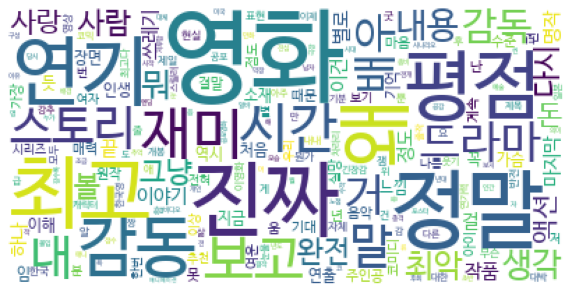

In [ ]:
data = ko.vocab().most_common(5000)
wordcloud = WordCloud(font_path="/Library/Fonts/NanumBarunGothic.ttf",
                      relative_scaling=0.2,
                      background_color='white',
                      stopwords=stopwords).generate_from_frequencies(dict(data))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Modeling

In [ ]:
X = train['document']
Y = train['label']
test_x = test['document']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                             min_df=3,
                             max_df=0.9,
                             tokenizer=okt.morphs,
                             token_pattern=None)
tfidf_vect.fit(X)
tfidf_x= tfidf_vect.transform(X)
tfidf_test_x = tfidf_vect.transform(test_x)


In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=42,test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4500,)
(500,)
(4500,)
(500,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                             min_df=3,
                             max_df=0.9,
                             tokenizer=okt.morphs,
                             token_pattern=None)

tfidf_vect.fit(x_train)
tfidf_train= tfidf_vect.transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)

In [ ]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform 

sgd = SGDClassifier(loss='log',random_state=1)
param_dist = {'alpha':loguniform(0.0001,100.0)}

rsv = RandomizedSearchCV (estimator = sgd, param_distributions=param_dist, n_iter=50, random_state=42, verbose=1)

rsv.fit(tfidf_train,y_train)

print(rsv.best_score_)
print(rsv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8417777777777777
{'alpha': 0.00018997763474111278}


In [ ]:
print(rsv.score(tfidf_test,y_test))

0.854


In [ ]:
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor 

ltok = LTokenizer()
print(ltok.tokenize(x_train[4]))

['지금까지의', '영화들이', '그랬듯', '이', '영화역시', '일본에', '대한', '미화는', '여전하다']


In [ ]:
word_ext = WordExtractor()
word_ext.train(x_train)
scores = word_ext.word_scores()

training was done. used memory 0.624 Gb
all cohesion probabilities was computed. # words = 2659
all branching entropies was computed # words = 3814
all accessor variety was computed # words = 3814


In [ ]:
import math 

score_dict = {key:scores[key].cohesion_forward *
              math.exp(scores[key].right_branching_entropy)
              for key in scores}

lto = LTokenizer(scores=score_dict)

print(lto.tokenize(x_train[4]))

['지금', '까지의', '영화', '들이', '그랬', '듯', '이', '영화', '역시', '일본', '에', '대한', '미화', '는', '여전', '하다']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_lto = TfidfVectorizer(ngram_range=(1,2),
                             min_df=3,
                             max_df=0.9,
                             tokenizer=lto.tokenizer,
                             token_pattern=None)

tfidf_lto.fit(x_train)
tfidf_lto_train= tfidf_vect.transform(x_train)
tfidf_lto_test = tfidf_vect.transform(x_test)

In [ ]:
sgd = SGDClassifier(loss='log',random_state=1)

rsv_soy = RandomizedSearchCV (estimator = sgd, param_distributions=param_dist, n_iter=50, random_state=42, verbose=1)

rsv_soy.fit(tfidf_lto_train,y_train)

print(rsv_soy.best_score_)
print(rsv_soy.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8417777777777777
{'alpha': 0.00013289448722869187}


In [ ]:
print(rsv_soy.score(tfidf_lto_test,y_test))

0.864


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

lto = TfidfVectorizer(ngram_range=(1,2),
                             min_df=3,
                             max_df=0.9,
                             tokenizer=lto.tokenizer,
                             token_pattern=None)

lto.fit(X)
lto_x= tfidf_vect.transform(X)
lto_test = tfidf_vect.transform(test_x)

In [ ]:
rsv_soy.fit(lto_x,Y)
pred = rsv_soy.predict(lto_test)

pred

Fitting 5 folds for each of 50 candidates, totalling 250 fits


array([0, 1, 0, ..., 1, 0, 1])

# 마무리

In [ ]:
sub= pd.DataFrame({
    "id": test['id'],
    'label':pred
})

sub.head(5)

,id,label
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [ ]:
sub.to_csv("submission.csv", index = False)
print("save")

save
